In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 로드
df_merged = pd.read_csv('df_merged.csv')

In [16]:
df_merged

,month,CO2ppm,Temp,Humid,VPD,Chl_a,Chl_b,TChl,Car,Chl_a_b,...,DF_abs,SFI_abs,Fv-Fm,Leaf_ExtractionYield,Root_ExtractionYield,Leaf_TPC,Root_TPC,Leaf_TFC,Root_TFC,scenario
0,5,381.681033,16.918639,83.130786,1.532512,8.79,2.22,11.00,2.97,3.97,...,0.328,0.215,0.830,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
1,5,374.463441,16.922124,83.096722,1.532868,8.99,2.56,11.55,3.09,3.52,...,0.287,0.199,0.826,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
2,5,371.850683,16.930256,82.488003,1.534584,9.66,2.44,12.10,3.11,3.96,...,0.384,0.229,0.828,20.70,20.40,7.369,6.396,5.242,0.841,SSP1
3,5,400.475202,16.921511,82.081632,1.534512,9.33,2.45,11.79,3.13,3.80,...,0.503,0.282,0.839,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
4,5,381.360788,16.921323,83.888666,1.531475,10.53,2.58,13.11,3.37,4.08,...,0.304,0.203,0.832,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,1208.463000,25.901000,60.192000,2.560000,2.64,0.52,3.15,1.07,5.09,...,-0.626,0.051,0.722,7.10,14.60,7.743,5.277,1.455,0.513,SSP5
401,9,1211.911000,25.896000,60.254000,2.559000,4.74,1.12,5.86,1.53,4.22,...,-0.829,0.046,0.588,7.05,14.55,7.760,5.245,1.450,0.507,SSP5
402,9,1206.015000,25.923000,59.125000,2.565000,2.52,0.08,2.60,1.38,31.49,...,-0.879,0.037,0.643,7.00,14.50,7.814,5.324,1.460,0.518,SSP5
403,9,1225.166000,25.890000,55.446000,2.571000,2.63,0.39,3.02,1.17,6.73,...,-0.478,0.067,0.727,7.10,14.60,7.743,5.277,1.455,0.513,SSP5


### 이상치 유형 구분
- 극한 반응 = 9월 생식생장기 급격한 변화
- 생물학적 한계 = 엽록소, Fv/Fm 등 생리적 범위

In [5]:
# 9월 극한값 (생리적 전환)
sept_data = df_merged[df_merged['month'] == 9]

In [6]:
# 9월 vs 다른 달 비교
other_months = df_merged[df_merged['month'] != 9]
comparison_vars = ['PI_abs', 'Fv-Fm', 'TChl']

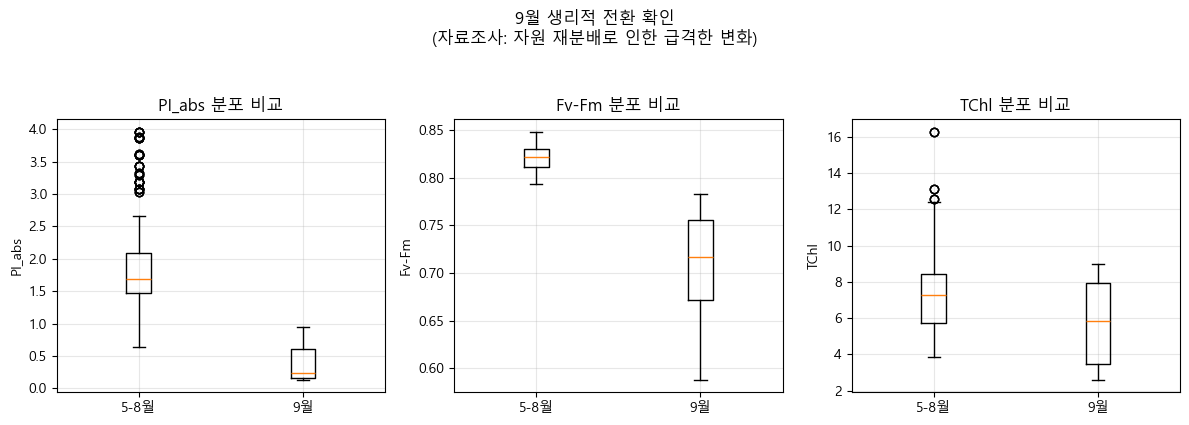

In [7]:
plt.figure(figsize=(12, 4))
for i, var in enumerate(comparison_vars, 1):
    plt.subplot(1, 3, i)
    plt.boxplot([other_months[var].dropna(), sept_data[var].dropna()], 
                labels=['5-8월', '9월'])
    plt.ylabel(var)
    plt.title(f'{var} 분포 비교')
    plt.grid(True, alpha=0.3)
plt.suptitle('9월 생리적 전환 확인\n(자료조사: 자원 재분배로 인한 급격한 변화)', y=1.05)
plt.tight_layout()
plt.show()

- 변수 3개로 한 이유
- 기능 감소(Pl_abs) 광합성 활성 감소, 구조변화(Fv/Fm) 광계 효율의 변화를 보여주고, 물질 재분배(Tchl) 엽록소 재분배
- 이 3가지의 변수가 9월에 자료조사를 보면 지상부 활성을 의도적으로 낮춘다고 하는데 그 이유를 보여주는 3가지 물질들. 

In [8]:
# Fv/Fm 분위수
fv_fm_quantiles = df_merged['Fv-Fm'].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99])
print("\nFv/Fm 분위수:")
for q, v in fv_fm_quantiles.items():
    print(f"  {q*100:3.0f}%: {v:.3f}")


Fv/Fm 분위수:
    1%: 0.590
    5%: 0.672
   25%: 0.803
   50%: 0.812
   75%: 0.827
   95%: 0.840
   99%: 0.845


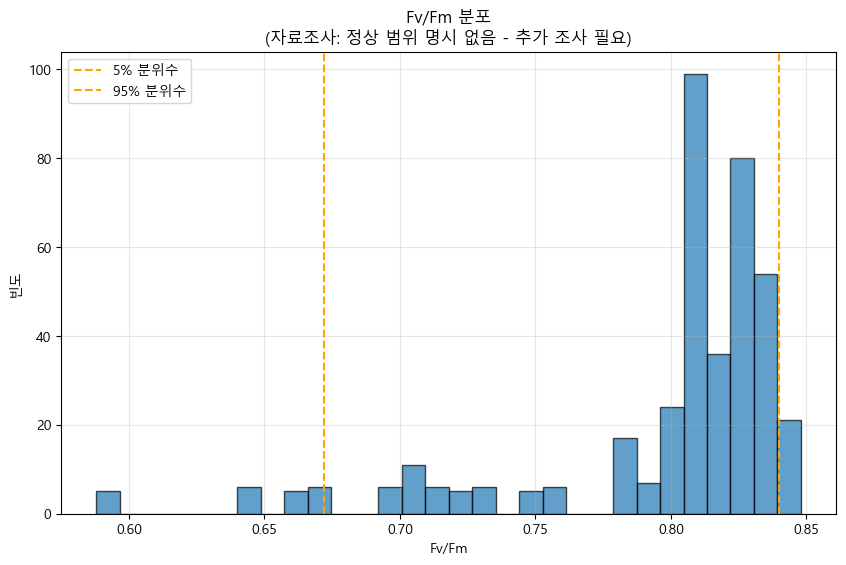

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df_merged['Fv-Fm'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=fv_fm_quantiles[0.05], color='orange', linestyle='--', label='5% 분위수')
plt.axvline(x=fv_fm_quantiles[0.95], color='orange', linestyle='--', label='95% 분위수')
plt.xlabel('Fv/Fm')
plt.ylabel('빈도')
plt.title('Fv/Fm 분포\n(자료조사: 정상 범위 명시 없음 - 추가 조사 필요)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

- 천궁 Fv/Fm 정상 범위 조사(자료 있을 수도 있으니)
- 일반 식물 범위 = 0.75-0.85 -> 현재 보이는 것도 비슷해 보임 -> 이거 기준으로 이상치 처리 하면 될 듯.

### 변수간 관계 확인 
- 자료조사
- CO2 → 광합성 → 1차 대사 → 2차 대사 경로
- 엽록소 간 강한 상관 예상 (Chl_a, Chl_b, TChl)
- 페놀과 플라보노이드 상관관계 확인 됐었음.

In [10]:
# 1. 엽록소 변수 간 다중공선성
chlorophyll_vars = ['Chl_a', 'Chl_b', 'TChl', 'Car']
chl_corr = df_merged[chlorophyll_vars].corr()

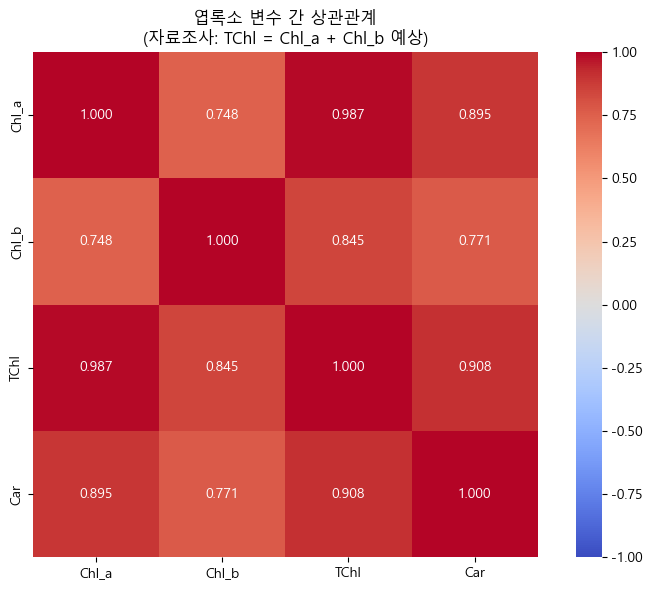

In [11]:
# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(chl_corr, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True)
plt.title('엽록소 변수 간 상관관계\n(자료조사: TChl = Chl_a + Chl_b 예상)')
plt.tight_layout()
plt.show()

- 강한 상관 보이는 것 EDA로 보임
- Tchl = chl_a + chl_b 라는 것 보여줌
- 개별 변수 유지 -> 서로 다른 생물학적 의미를 가짐. 
- 상관관계 높아도 각 변수 고유 정보 담고 있어 예측력 향상 기여 가능

In [ ]:
# 2. 페놀-플라보노이드 관계 검증
corr_leaf = df_merged['Leaf_TPC'].corr(df_merged['Leaf_TFC'])
corr_root = df_merged['Root_TPC'].corr(df_merged['Root_TFC'])

# 상관계수 값 출력
print(f"  Leaf: {corr_leaf:.3f}")
print(f"  Root: {corr_root:.3f}")

  Leaf: 0.549
  Root: 0.856


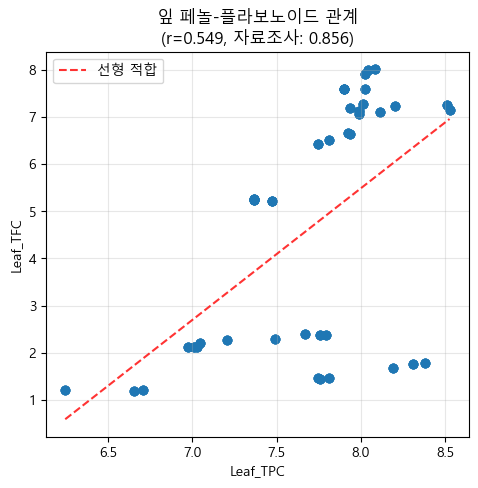

In [ ]:
# 잎 - 페놀과 폴라보노이드 관계 EDA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_merged['Leaf_TPC'], df_merged['Leaf_TFC'], alpha=0.5)
plt.xlabel('Leaf_TPC')
plt.ylabel('Leaf_TFC')
plt.title(f'잎 페놀-플라보노이드 관계\n(r={corr_leaf:.3f}, 자료조사: 0.856)')
z = np.polyfit(df_merged['Leaf_TPC'], df_merged['Leaf_TFC'], 1)
p = np.poly1d(z)
plt.plot(df_merged['Leaf_TPC'].sort_values(), p(df_merged['Leaf_TPC'].sort_values()), 
         "r--", alpha=0.8, label='선형 적합')
plt.legend()
plt.grid(True, alpha=0.3)

- TPC, TFC 같이 증가하는 것도 있고, TFC 낮아지는 경우도 있음
- -> 월별, 온도별 SSP 별로 보면 더 잘 보일 거 같음.

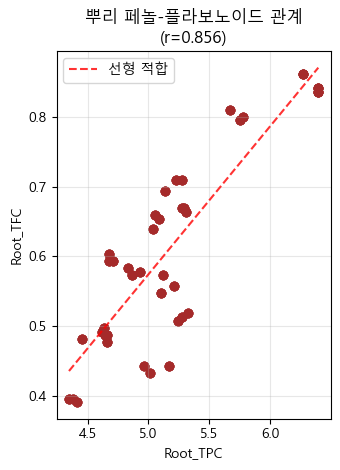

In [15]:
# 뿌리 페놀 - 폴라보노이드 관계 확인
plt.subplot(1, 2, 2)
plt.scatter(df_merged['Root_TPC'], df_merged['Root_TFC'], alpha=0.5, color='brown')
plt.xlabel('Root_TPC')
plt.ylabel('Root_TFC')
plt.title(f'뿌리 페놀-플라보노이드 관계\n(r={corr_root:.3f})')
z = np.polyfit(df_merged['Root_TPC'], df_merged['Root_TFC'], 1)
p = np.poly1d(z)
plt.plot(df_merged['Root_TPC'].sort_values(), p(df_merged['Root_TPC'].sort_values()), 
         "r--", alpha=0.8, label='선형 적합')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- 뿌리에서 TPC 높으면 TFC 높아지는 강한 관계 확인

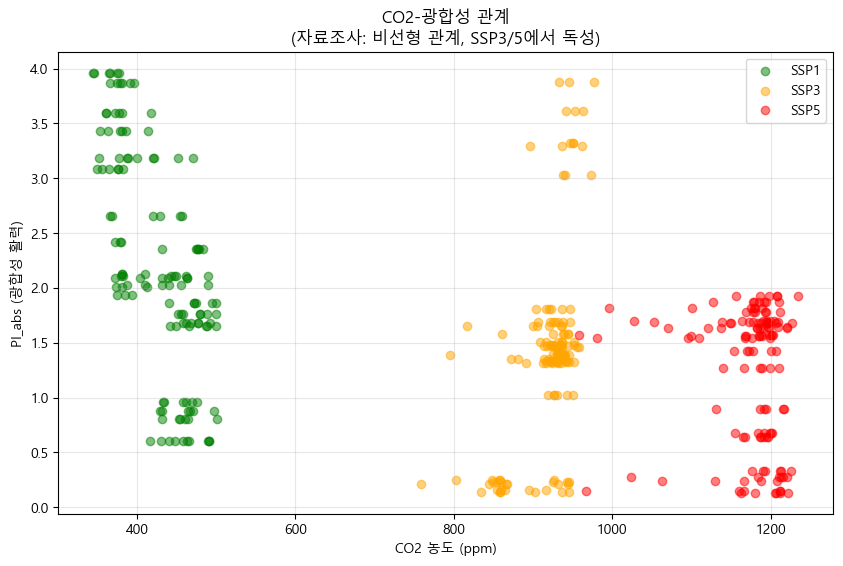

In [17]:
# 3. CO2-광합성 비선형 관계
plt.figure(figsize=(10, 6))
colors = {'SSP1': 'green', 'SSP3': 'orange', 'SSP5': 'red'}
for scenario in ['SSP1', 'SSP3', 'SSP5']:
    data = df_merged[df_merged['scenario'] == scenario]
    plt.scatter(data['CO2ppm'], data['PI_abs'], 
               alpha=0.5, label=scenario, color=colors[scenario])
plt.xlabel('CO2 농도 (ppm)')
plt.ylabel('PI_abs (광합성 활력)')
plt.title('CO2-광합성 관계\n(자료조사: 비선형 관계, SSP3/5에서 독성)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

- 비선형 관계 보여줌.
- SSP3, SSP5 CO2 농도 높아지면 높아질 수록 광합성 활력이 안 좋아짐.
- SSP1의 경우 CO2 농도 적합량 주입 시 광합성 활성 매우 높게 보임.
- SSP3의 경우 CO2 농도가 높은 경우에도 광합성 활성이 잘 나오는 부분들이 있음
- -> 자료조사와 매치 안 되는 부분 다양한 SSP3 위주 확인.
- -> SSP1도 자료조사에서 광합성 활성 대부분 좋게 나와야 하는데 지금 안 좋게 나오는 부분도 보임. 이것도 확인

### 시계열 특성 분석
- 5-7월 영양생식기 -> 8-9월 생식생장기
- 월별 호르몬 조절로 인한 자원 재분배
- 계절적 패턴 존재 가능성 높음

In [19]:
# 시나리오별 월평균 계산
monthly_means = df_merged.groupby(['scenario', 'month'])['PI_abs'].mean().unstack()

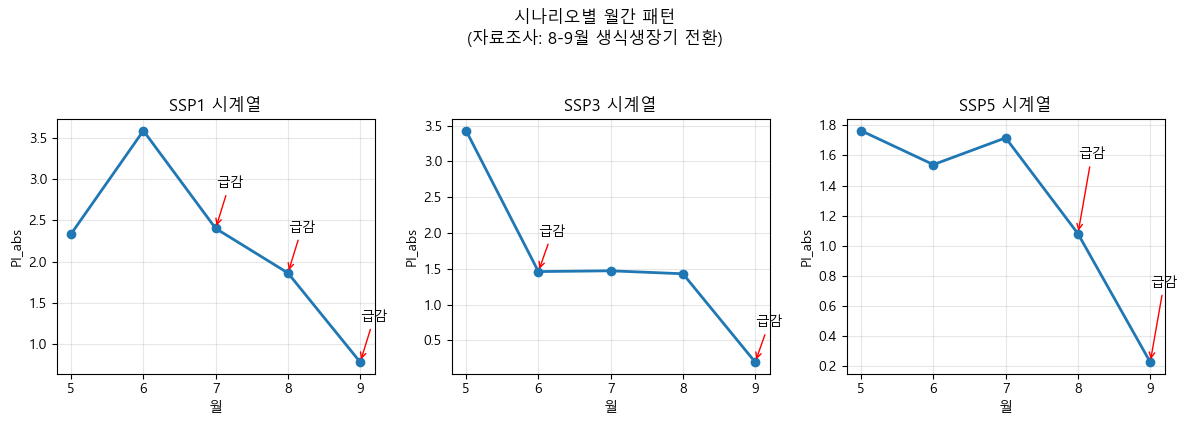

In [20]:
# 월별 자기상관 (각 시나리오별)
plt.figure(figsize=(12, 4))
for i, scenario in enumerate(['SSP1', 'SSP3', 'SSP5'], 1):
    plt.subplot(1, 3, i)
    if scenario in monthly_means.index:
        values = monthly_means.loc[scenario].values
        months = monthly_means.columns
        plt.plot(months, values, marker='o', linewidth=2)
        plt.xlabel('월')
        plt.ylabel('PI_abs')
        plt.title(f'{scenario} 시계열')
        plt.grid(True, alpha=0.3)
        
        # 1차 차분으로 추세 확인
        diff = np.diff(values)
        for j in range(len(diff)):
            if diff[j] < -0.5:  # 급격한 감소
                plt.annotate('급감', xy=(months[j+1], values[j+1]), 
                           xytext=(months[j+1], values[j+1]+0.5),
                           arrowprops=dict(arrowstyle='->', color='red'))

plt.suptitle('시나리오별 월간 패턴\n(자료조사: 8-9월 생식생장기 전환)', y=1.05)
plt.tight_layout()
plt.show()

- 계절적 패턴으로 보이는 부분 7-9월 감소 보임.
- SSP3 6월에 급격히 감소하는데 CO2 + 고온 조기 성숙 촉진 가능성 높음
- SSP5 생존 위주 -> CO2 너무 높고, 극고온
- SSP1 안정적 재배 가능. -> SSP3 = 품질 저하 발생, SSP5 = 생존 우선

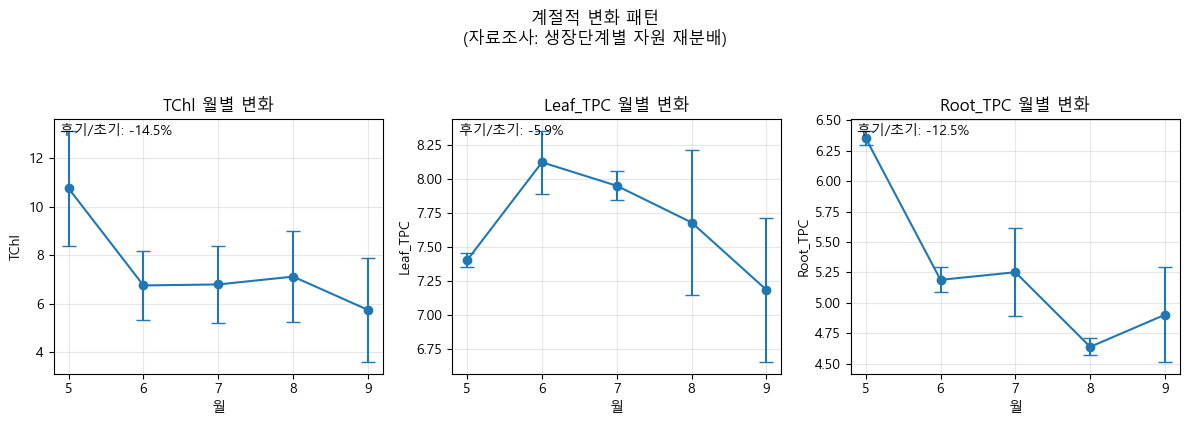

In [21]:
# 계절성 검정
seasonal_vars = ['TChl', 'Leaf_TPC', 'Root_TPC']

plt.figure(figsize=(12, 4))
for i, var in enumerate(seasonal_vars, 1):
    plt.subplot(1, 3, i)
    monthly_data = df_merged.groupby('month')[var].agg(['mean', 'std'])
    plt.errorbar(monthly_data.index, monthly_data['mean'], 
                yerr=monthly_data['std'], marker='o', capsize=5)
    plt.xlabel('월')
    plt.ylabel(var)
    plt.title(f'{var} 월별 변화')
    plt.grid(True, alpha=0.3)
    
    # 5-7월 vs 8-9월 평균 비교
    early = df_merged[df_merged['month'].isin([5,6,7])][var].mean()
    late = df_merged[df_merged['month'].isin([8,9])][var].mean()
    change = (late - early) / early * 100
    plt.text(0.02, 0.98, f'후기/초기: {change:+.1f}%', 
            transform=plt.gca().transAxes, va='top')

plt.suptitle('계절적 변화 패턴\n(자료조사: 생장단계별 자원 재분배)', y=1.05)
plt.tight_layout()
plt.show()

- 세 변수 = 서로 다른 생리적 기능 대표
- 5월 높은 페놀 함량 관찰 -> 광산화적 스트레스 보호
- 여름 될수록 페놀화합물 합성 감소 